## Midterm Project - Group 7
*Members*: Adrianna Bernardo, Andreas Paljug, Jessica Paley, Ripkin Walker

*Program Flow*:
[Oscillator -> FM Synthesis -> ADSR -> Filter -> Delay],  Seperate MIDI Playback Mechanism


In [14]:
##Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
from IPython.display import Audio
plt.rcParams['figure.figsize'] = (12,4)

# Used for additive synthesis in the oscillators below
def genSine(f=None, t=1, A=1, phi=0, fs=44100):
    """
    Inputs:
    A (float) = amplitude of the sinusoid
    f (float) = frequency of the sinusoid in Hz
    phi (float) = initial phase of the sinusoid in radians
    fs (float) = sampling frequency of the sinusoid in Hz
    t (float) = duration of the sinusoid (in seconds)
    Output:
    The function should return a numpy array
    x (numpy array) = The generated sinusoid (use np.cos())
    """
    import numpy as np
    A = float(A)
    f = float(f) 
    float(phi)
    fs = float(fs)
    t = float(t) 
    
    x = A * np.sin(2*np.pi*f*np.arange(0,t,1/fs) + phi)
    return(x)

Below is a table demonstrating the waveform our instrumnt is based upon, showing which harmonics are present and at which amplitudes:

| Waveshape | a1 | a2 | a3| a4| a5| a6| a7 | a8 | a9 | aN | General Rule |
| ---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: |:---: | :------------------: |
| Sine | 1 | 0 | 0 | 0 | 0 |0 | 0 | 0 | 0 | ... | $f0$ only |
| TRESLECHES |  1 | 0 | 0 | 1/4 | 0 | 0 | 1/7 | 0 | 0 | ... |$1/x$ for every third integer| 


In [7]:

## Oscillator Function - Named Tres Leches 
def genTresLeches(f=None, harm = 5, t=1, A=1,phi=0,  fs=44100):
    tresHarmonics = np.array([np.multiply(genSine(f * i,t,A,phi,fs),1.0/(i)) for i in range(1, harm + 1, 3)]) 
    tres = tresHarmonics.sum(axis=0)
    #normalize amplitude
    tres = tres /np.max(tres) * A
    return tres


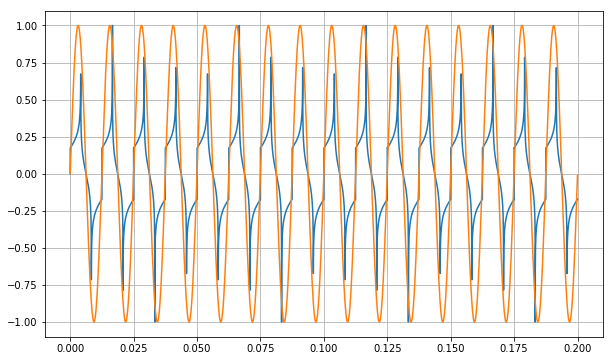

In [25]:
## DEMO of Oscillator Function
freq = 80
fs = 44100 #sampleing rate
seconds = 1
time = np.arange(0, seconds, 1.0/fs )
harm = 20

tres = genTresLeches(freq, t = seconds, fs = fs, harm = 5000)
sin = genSine(freq, t = seconds, fs = fs)

plt.figure(figsize=(10,6))
plt.plot(time[0:time.size/5], (tres[0:tres.size/5]), time[0:time.size/5], sin[0:time.size/5])
plt.grid(True, which='both')
Audio(tres, rate= fs)

In [22]:
## ADSR Envelope
def ADSR():
    ##TODO
    return None

In [23]:
## FM Synthesis
def FM():
    ##TODO
    return None

In [24]:
## Delay
def delay(waveform, offset = 350,fs = 44100):
    copy = waveform.copy()
    pad = np.zeros(int(fs/1000*offset))    
    orig = np.concatenate([copy, pad] )
    delay = np.concatenate([pad, copy])
    delayed = orig + delay
    return delayed

In [20]:
## Filter (LP, HP, BP) 
def filter():
    ##TODO
    return None

In [ ]:
###MIDI Playback / Widgets
def midiPlayback():
    